In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
comp_sci = '/Users/machestuesta/Desktop/degree_revision/computer_science.csv'
course_2 = '/Users/machestuesta/Desktop/degree_revision/course_2.csv'  # maths and computer science
course_3 = '/Users/machestuesta/Desktop/degree_revision/course_3.csv'  # Information technology
course_4 = '/Users/machestuesta/Desktop/degree_revision/course_4.csv'  # electrical and electronics engineering 

In [3]:
cs = pd.read_csv(comp_sci)

In [4]:
cs.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,2017,2018,2019,2020,2021,2022,2023
0,1,1057115,EGERTON UNIVERSITY,BACHELOR OF SCIENCE(COMPUTER SCIENCE),38.035,37.208,38.559,38.76,35.309,37.746,38.37
1,2,1073115,RONGO UNIVERSITY,BACHELOR OF SCIENCE(COMPUTER SCIENCE),26.233,25.013,24.943,19.481,19.223,18.638,25.117
2,3,1082115,MASINDE MULIRO UNIVERSITY OF SCIENCE & TECHNOLOGY,BACHELOR OF SCIENCE(COMPUTER SCIENCE),33.847,33.065,35.165,35.965,34.082,36.441,36.48
3,4,1087115,KISII UNIVERSITY,BACHELOR OF SCIENCEIN COMPUTER SCIENCE,33.106,24.726,26.915,30.016,19.223,23.378,23.41
4,5,1096115,GARISSAUNIVERSITY,BACHELOR OF SCIENCEIN COMPUTER SCIENCE,-,24.816,29.587,19.481,19.223,18.638,18.814


## Cleaning and Formatting the data

### Computer science

In [5]:
# Checking for the data types of various column values (object= string)

cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  47 non-null     int64 
 1   Unnamed: 1  47 non-null     int64 
 2   Unnamed: 2  47 non-null     object
 3   Unnamed: 3  47 non-null     object
 4   2017        47 non-null     object
 5   2018        47 non-null     object
 6   2019        47 non-null     object
 7   2020        47 non-null     object
 8   2021        47 non-null     object
 9   2022        47 non-null     object
 10  2023        47 non-null     object
dtypes: int64(2), object(9)
memory usage: 4.2+ KB


In [6]:
# changing the names of the columns

cs.columns = ['drop', 'code', 'Institution', 'degree_name', '2017', '2018', '2019', '2020',	'2021',	'2022', '2023']

In [7]:
cs.head(1) # confirming the change

,drop,code,Institution,degree_name,2017,2018,2019,2020,2021,2022,2023
0,1,1057115,EGERTON UNIVERSITY,BACHELOR OF SCIENCE(COMPUTER SCIENCE),38.035,37.208,38.559,38.76,35.309,37.746,38.37


In [8]:
# Drop the first column (Its not required)

In [9]:
cs.drop(columns= ['drop'], inplace = True)

In [10]:
# looking for unique values using a sample column '2023'

cs['2023'].unique()

array(['38.37', '25.117', '36.48', '23.41', '18.814', '35.372', '26.078',
       '43.497', '35.408', '34.003', '24.015', '41.039', '32.782',
       '35.264', '39.746', '26.766', '38.155', '33.433', '24.643',
       '44.101', '38.968', '44.825', '28.842', '35.796', '24.072', '-',
       '24.086', '35.024', '33.591', '37.695', '35.209', '25.508',
       '39.238'], dtype=object)

In [11]:
# replacing the invalid values with NaN values and the valid data to numeric

cols = ['2017', '2018', '2019',	'2020',	'2021',	'2022',	'2023']
cs[cols] = cs[cols].apply(pd.to_numeric, errors= 'coerce')

In [12]:
cs['2023'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 47 entries, 0 to 46
Series name: 2023
Non-Null Count  Dtype  
--------------  -----  
46 non-null     float64
dtypes: float64(1)
memory usage: 508.0 bytes


In [13]:
# droppig all the rows that have all values as 'NaN' and resetting the index

cs.dropna(how= 'all', inplace= True)
cs.reset_index(drop= True, inplace= True)
cs.index += 1

# dropping all the rows that have no 'institution name' or invalid institution name
cs.dropna(subset=['Institution'], inplace=True)

# also some rows aren't relevant for they dont have the values we need from 2017 to 2023
filter = cs.loc[:, '2017':'2023'].isna().all(axis=1)
cs = cs.loc[~filter]

In [14]:
cs.shape

(47, 10)

In [15]:
# add a column that contains the row mean  of the respective institutions

In [16]:
cs['mean'] = cs.loc[:, '2017':'2023'].mean(axis= 1) # to get the row mean, the axis should be specified as '1'
cs.head(2)

,code,Institution,degree_name,2017,2018,2019,2020,2021,2022,2023,mean
1,1057115,EGERTON UNIVERSITY,BACHELOR OF SCIENCE(COMPUTER SCIENCE),38.035,37.208,38.559,38.760,35.309,37.746,38.370,37.712429
2,1073115,RONGO UNIVERSITY,BACHELOR OF SCIENCE(COMPUTER SCIENCE),26.233,25.013,24.943,19.481,19.223,18.638,25.117,22.664000


In [17]:
# sorting the data frame according to the mean

sorted_cs = cs.sort_values(by= 'mean', ascending= False, na_position= 'last')

```python
sorted_cs
```

In [18]:
# Specify the path to your Documents folder (replace with your actual path if different)
file_path = r"C:\Users\machestuesta\Documents\cs_excel_file.xlsx" # Replace with your actual path

# Save the DataFrame to Excel
cs.to_excel(file_path, index=False) # index= False to exclude the DataFrame index from the Excel file

## Analysing course 1 (Computer Science)

#### Top uinverstities offering computer science

In [19]:
top_uni = sorted_cs[:10]

In [20]:
top_uni.reset_index(drop= True, inplace= True)
top_uni.index += 1

In [21]:
# Specify the path to your Documents folder (replace with your actual path if different)
file_path = r"C:\Users\machestuesta\Documents\cs_excel_file1.xlsx"

# Save the DataFrame to Excel
top_uni.to_excel(file_path, index=False) # index= False to exclude the DataFrame index from the Excel file

#### Now we create a line graph to analyse the trend over the last years

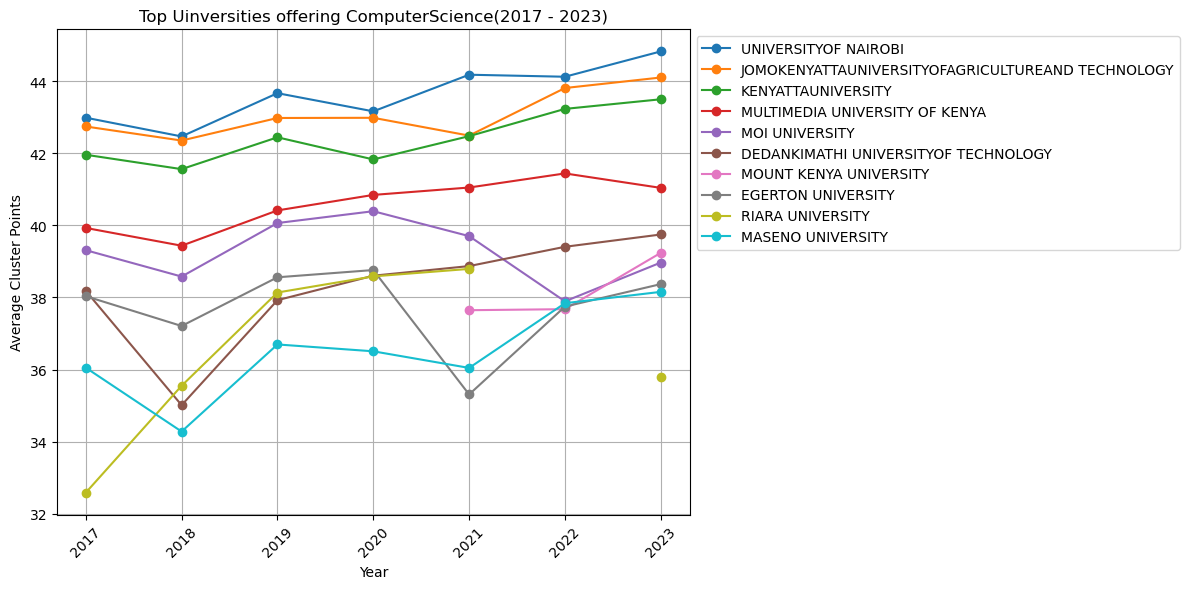

In [22]:
# Load the Excel file
file_path = "C:\\Users\\machestuesta\\Documents\\cs_excel_file1.xlsx"
top_uni = pd.read_excel(file_path, sheet_name='Sheet1')

# Define the years to analyze
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Get the list of unique universities
universities = top_uni["Institution"].unique()

# Create the plot
plt.figure(figsize=(12, 6))

for university in universities:
    uni_data = top_uni[top_uni["Institution"] == university]
    mean_cluster_points = uni_data[years].mean()  # Averaging over multiple programs if present
    plt.plot(years, mean_cluster_points, marker='o', label=university)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Average Cluster Points")
plt.title("Top Uinversities offering ComputerScience(2017 - 2023)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Analysing course 2 (Maths and computer science)

In [23]:
# loading the course into a data frame
c2 = pd.read_csv(course_2)

 ### Cleaning the course 2 data

In [24]:
#renaming the columns 
c2.columns = ['drop', 'code', 'Institution', 'degree_name', '2017', '2018', '2019', '2020',	'2021',	'2022', '2023']

In [25]:
# converting the values of the year columns to numeric values
c2[cols] = c2[cols].apply(pd.to_numeric, errors= 'coerce')

In [26]:
# dropping the rows that have all values as NaN and resetting the index
c2.dropna(how= 'all', inplace= True)
c2.reset_index(drop= True, inplace= True)
c2.index += 1

In [27]:
# dropping all the rows that have no 'institution name' or invalid institution name
c2.dropna(subset=['Institution'], inplace=True)

```python
# and the drop the 'drop' column
cs.drop(columns= ['drop'], inplace = True)
```

In [28]:
# also some rows aren't relevant for they dont have the values we need from 2017 to 2023
filter = c2.loc[:, '2017':'2023'].isna().all(axis=1)
c2 = c2.loc[~filter]

In [29]:
# finally we sort the institutions in descenging order according to the mean

# creating the mean column
c2['mean'] = c2.loc[:, '2017':'2023'].mean(axis= 1) # to get the row mean, the axis should be specified as '1'

In [30]:
# sorting according to the mean (descending order) 
sorted_uni2 = c2.sort_values(by= 'mean', ascending= False, na_position= 'last')
top_uni2 = sorted_uni2[:5]
top_uni2.reset_index(drop= True, inplace= True)
top_uni2.index += 1

In [31]:
# Specify the path to your Documents folder 
file_path = r"C:\Users\machestuesta\Documents\cs_excel_file2.xlsx" # Replace with your actual path

# Save the DataFrame to Excel
top_uni2.to_excel(file_path, index=False) # index= False to exclude the DataFrame index from the Excel file

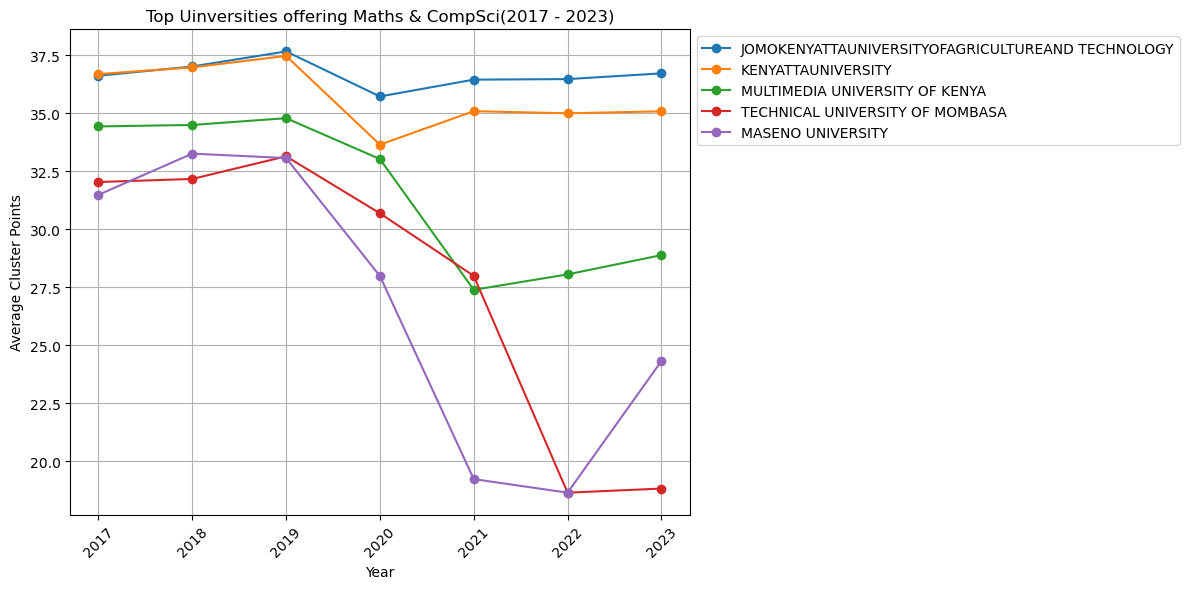

In [32]:
# Load the Excel file
file_path = "C:\\Users\\machestuesta\\Documents\\cs_excel_file2.xlsx"
top_uni2 = pd.read_excel(file_path)

# Define the years to analyze
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Get the list of unique universities
universities = top_uni2["Institution"].unique()

# Create the plot
plt.figure(figsize=(12, 6))

for university in universities:
    uni_data = top_uni2[top_uni2["Institution"] == university]
    mean_cluster_points = uni_data[years].mean()  # Averaging over multiple programs if present
    plt.plot(years, mean_cluster_points, marker='o', label=university)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Average Cluster Points")
plt.title("Top Uinversities offering Maths & CompSci(2017 - 2023)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Analysing course 3 (Information Technology)

In [33]:
# loading the course into a data frame
c3 = pd.read_csv(course_3)

#renaming the columns 
c3.columns = ['drop', 'code', 'Institution', 'degree_name', '2017', '2018', '2019', '2020',	'2021',	'2022', '2023']

# converting the values of the year columns to numeric values
c3[cols] = c3[cols].apply(pd.to_numeric, errors= 'coerce')

# dropping the rows that have all values as NaN and resetting the index
c3.dropna(how= 'all', inplace= True)
c3.reset_index(drop= True, inplace= True)
c3.index += 1

# dropping all the rows that have no 'institution name' or invalid institution name
c3.dropna(subset=['Institution'], inplace=True)

#You cant run this code multiple times, only once # and the drop the 'drop' column
c3.drop(columns= ['drop'], inplace = True)

# also some rows aren't relevant for they dont have the values we need from 2017 to 2023
filter = c3.loc[:, '2017':'2023'].isna().all(axis=1)
c3 = c3.loc[~filter]

# finally we sort the institutions in descenging order according to the mean

# creating the mean column
c3['mean'] = c3.loc[:, '2017':'2023'].mean(axis= 1) # to get the row mean, the axis should be specified as '1'

# finally we sort the institutions in descenging order according to the mean

# sorting according to the mean (descending order) 
sorted_uni3 = c3.sort_values(by= 'mean', ascending= False, na_position= 'last')
top_uni3 = sorted_uni3[:5]
top_uni3.reset_index(drop= True, inplace= True)
top_uni3.index += 1


# Specify the path to your Documents folder 
file_path = r"C:\Users\machestuesta\Documents\cs_excel_file3.xlsx" # Replace with your actual path

# Save the DataFrame to Excel
top_uni3.to_excel(file_path, index=False) # index= False to exclude the DataFrame index from the Excel file

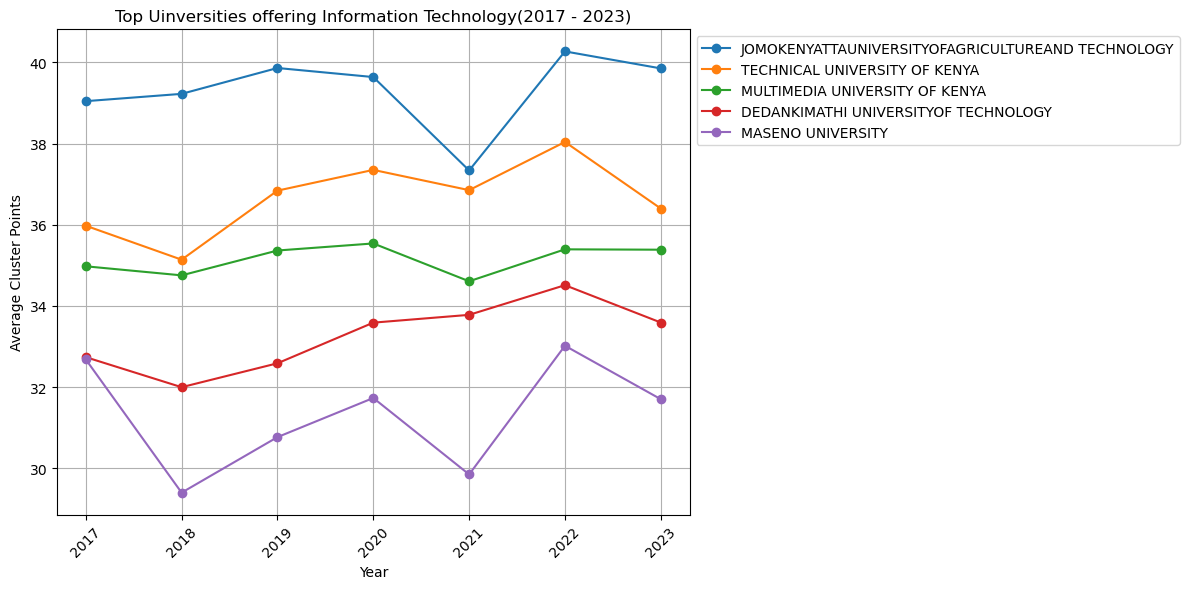

In [34]:
# Load the Excel file
file_path = "C:\\Users\\machestuesta\\Documents\\cs_excel_file3.xlsx"
top_uni3 = pd.read_excel(file_path)

# Define the years to analyze
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Get the list of unique universities
universities = top_uni3["Institution"].unique()

# Create the plot
plt.figure(figsize=(12, 6))

for university in universities:
    uni_data = top_uni3[top_uni3["Institution"] == university]
    mean_cluster_points = uni_data[years].mean()  # Averaging over multiple programs if present
    plt.plot(years, mean_cluster_points, marker='o', label=university)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Average Cluster Points")
plt.title("Top Uinversities offering Information Technology(2017 - 2023)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Analysing course 4 (Electrical and elecronic engineering)

In [35]:
# loading the course into a data frame
c4 = pd.read_csv(course_4)

#renaming the columns 
c4.columns = ['drop', 'code', 'Institution', 'degree_name', '2017', '2018', '2019', '2020',	'2021',	'2022', '2023']

# converting the values of the year columns to numeric values
c4[cols] = c4[cols].apply(pd.to_numeric, errors= 'coerce')

# dropping the rows that have all values as NaN and resetting the index
c4.dropna(how= 'all', inplace= True)
c4.reset_index(drop= True, inplace= True)
c4.index += 1

# dropping all the rows that have no 'institution name' or invalid institution name
c4.dropna(subset=['Institution'], inplace=True)

#You cant run this code multiple times, only once # and the drop the 'drop' column
c4.drop(columns= ['drop'], inplace = True)

# also some rows aren't relevant for they dont have the values we need from 2017 to 2023
filter = c4.loc[:, '2017':'2023'].isna().all(axis=1)
c4 = c4.loc[~filter]

# finally we sort the institutions in descenging order according to the mean

# creating the mean column
c4['mean'] = c4.loc[:, '2017':'2023'].mean(axis= 1) # to get the row mean, the axis should be specified as '1'

# finally we sort the institutions in descenging order according to the mean

# sorting according to the mean (descending order) 
sorted_uni4 = c4.sort_values(by= 'mean', ascending= False, na_position= 'last')
top_uni4 = sorted_uni4[:5]
top_uni4.reset_index(drop= True, inplace= True)
top_uni4.index += 1


# Specify the path to your Documents folder 
file_path4 = r"C:\Users\machestuesta\Documents\cs_excel_file4.xlsx" # Replace with your actual path

# Save the DataFrame to Excel
top_uni4.to_excel(file_path, index=False) # index= False to exclude the DataFrame index from the Excel file

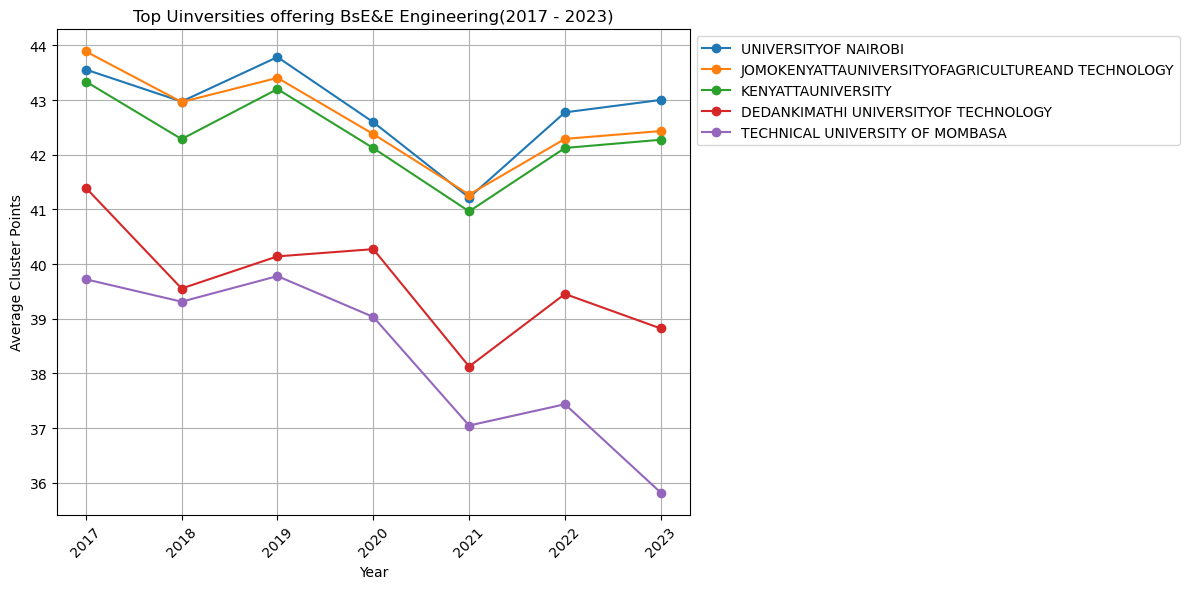

In [37]:
# Load the Excel file
file_path4 = "C:\\Users\\machestuesta\\Documents\\cs_excel_file4.xlsx"
top_uni4 = pd.read_excel(file_path4)

# Define the years to analyze
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Get the list of unique universities
universities = top_uni4["Institution"].unique()

# Create the plot
plt.figure(figsize=(12, 6))

for university in universities:
    uni_data = top_uni4[top_uni4["Institution"] == university]
    mean_cluster_points = uni_data[years].mean()  # Averaging over multiple programs if present
    plt.plot(years, mean_cluster_points, marker='o', label=university)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Average Cluster Points")
plt.title("Top Uinversities offering BsE&E Engineering(2017 - 2023)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()